# Question: Does the pangenome model include reactions from eukaryotes?

In [1]:
import cobra

In [2]:
import pandas as pd

In [15]:
from matplotlib_venn import venn2

In [3]:
# Load the model
gem_bayesian_core = cobra.io.load_json_model('alteromonas_bayesian_core.json')

Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [17]:
gem_intersection = cobra.io.read_sbml_model('MIT1002_intersection.sbml')

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00443_c0 "ABEE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02920_c0 "2_Amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridinediphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00012_c0 "PPi_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00067_c0 "H_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00683_c0 "Dihydropteroate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00002_c0 "ATP_c0">
Use of the species charge attribute is discouraged, use fbc:charge

In [20]:
gem_union = cobra.io.read_sbml_model('MIT1002_union.sbml')

Model does not contain SBML fbc package information.
SBML package 'layout' not supported by cobrapy, information is not parsed
SBML package 'render' not supported by cobrapy, information is not parsed
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00443_c0 "ABEE_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd02920_c0 "2_Amino_4_hydroxy_6_hydroxymethyl_7_8_dihydropteridinediphosphate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00012_c0 "PPi_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00067_c0 "H_plus__c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00683_c0 "Dihydropteroate_c0">
Use of the species charge attribute is discouraged, use fbc:charge instead: <Species M_cpd00002_c0 "ATP_c0">
Use of the species charge attribute is discouraged, use fbc:charge

In [4]:
len(gem_bayesian_core.reactions)

4142

In [5]:
# Load the model seed database for the gram negative bacteria template
gram_neg_db = pd.read_csv('../../../ModelSEEDDatabase/Templates/GramNegative/Reactions.tsv',
                          sep='\t',
                          header=0)

In [6]:
gram_neg_db.head()

,id,compartment,direction,gfdir,type,base_cost,forward_cost,reverse_cost,complexes
0,rxn00001,c|e,>,=,conditional,3,0.000,0.46090,cpx01833|cpx01834|cpx01835|cpx34574
1,rxn00002,c|e,>,=,conditional,2,0.000,0.03770,cpx01285|cpx01286|cpx34429
2,rxn00003,c|e,=,=,conditional,4,2.053,0.00000,cpx31894
3,rxn00004,c|e,=,=,conditional,4,0.000,0.00000,cpx34891
4,rxn00006,c|e,>,=,conditional,3,0.000,-3.53543,cpx01324|cpx30476


In [8]:
missing_rxns = [r.id for r in gem_bayesian_core.reactions if r.id not in gram_neg_db['id'].tolist()]

In [9]:
len(missing_rxns)

3533

In [10]:
missing_rxns

['BIOMASS_Ecoli_core_w_GAM',
 'rxn17699',
 'rxn37947',
 'rxn37948',
 'rxn06651',
 'rxn19478',
 'rxn22968',
 'rxn24470',
 'rxn24518',
 'rxn27790',
 'rxn28370',
 'rxn28375',
 'rxn31680',
 'HMG1',
 'rxn06866',
 'rxn17232',
 'BG(CELLB)',
 'rxn06272',
 'rxn15007',
 'rxn15033',
 'rxn15342',
 'rxn15343',
 'rxn15386',
 'rxn15387',
 'rxn15501',
 'rxn15502',
 'rxn15505',
 'rxn15506',
 'rxn21112',
 'rxn24067',
 'rxn24068',
 'rxn25680',
 'rxn25763',
 'rxn28164',
 'rxn28311',
 'rxn28389',
 'rxn28489',
 'rxn30940',
 'rxn32423',
 'rxn32425',
 'rxn33567',
 'rxn33569',
 'rxn33580',
 'rxn37973',
 'rxn39403',
 'MMSAD3',
 'MMSAD1',
 'MMSDHir',
 'rxn37807',
 'MAN1PT',
 'rxn15270',
 'rxn32674',
 'rxn32684',
 'GHMT',
 'rxn15964',
 'rxn16414',
 'TKT2',
 'TKT1',
 'rxn15271',
 'rxn15630',
 'rxn27495',
 'rxn27536',
 'rxn38499',
 'TAL',
 'rxn29919',
 'rxn18031',
 'rxn40848',
 'IPPMIb',
 'IPPMIa',
 'LEU1_1',
 'rxn32196',
 'rxn33387',
 'PGAMT',
 'GF6PTA',
 'rxn15064',
 'G6PDH',
 'G6PBDH',
 'rxn15072',
 'G6PDH2er',


In [12]:
pangenome_rxns_filtered = [r.id for r in gem_bayesian_core.reactions if r.id not in missing_rxns]

In [13]:
len(pangenome_rxns_filtered)

609

In [14]:
3533 + 609

4142

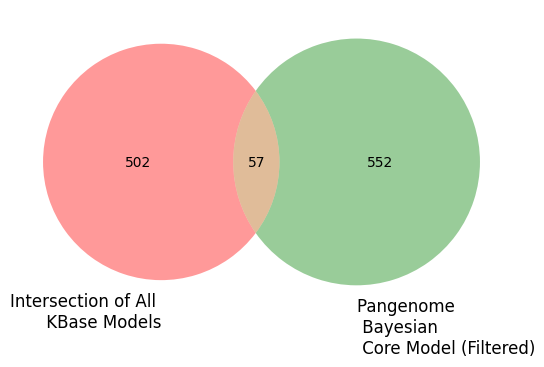

In [19]:
venn2([set([r.id[0:-3] for r in gem_intersection.reactions]),
       set([r for r in pangenome_rxns_filtered])],
       set_labels=('Intersection of All \n KBase Models',
                   'Pangenome \n Bayesian \n Core Model (Filtered)')
       )

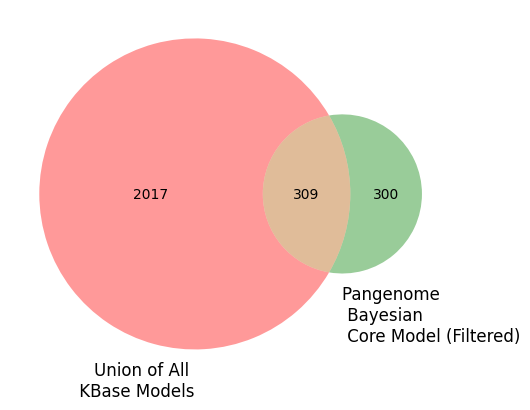

In [21]:
venn2([set([r.id[0:-3] for r in gem_union.reactions]),
       set([r for r in pangenome_rxns_filtered])],
       set_labels=('Union of All \n KBase Models',
                   'Pangenome \n Bayesian \n Core Model (Filtered)')
       )